In [44]:
#imports
import csv
from openpyxl import Workbook, load_workbook
import matplotlib.pyplot as plt
import numpy as np
import re
import copy

In [27]:
# constants
PURCHASE_BEHAVIOR_FILE = "QVI_purchase_behaviour.csv"
TRANSACTION_DATA_FILE = "QVI_transaction_data.xlsx"

In [28]:
# csv column to array
# takes a csv filename and column number, optional convert to type
def csv_column_to_arr( csv_file, column, convert=str ):
  csv_reader = csv.reader( open( csv_file, newline="" ), delimiter="," )
  arr = []
  i = 0
  for row in csv_reader:
    if i > 0: # filter first title lines
      arr.append( convert( row[ column - 1 ] ) )
    i += 1
  return arr

In [29]:
# xlsx colunm to array
# takes a worksheet and column number
def xlsx_column_to_arr( ws, column ):
  arr = []
  row_range = len( tuple( ws.rows ) )
  i = 0
  for row in ws.iter_rows( min_row=1, max_row=row_range, min_col=column, max_col=column ):
    for cell in row:
      if i > 0: # filter first title row
        arr.append( cell.value )
      i += 1
  return arr

In [30]:
def get_company_names( arr ):
  names = []
  for i in arr:
    names.append( i[ :20 ] )
  return names

In [31]:
def get_product_types( arr ):
  types = []
  for i in arr:
    types.append( i[ 20:-4 ] )
  return types

In [32]:
def get_product_amount( arr ):
  amounts = []
  for i in arr:
    res = re.search( "([0-9][0-9][0-9])g", i )
    if res == None:
      amounts.append( 0 )
    else:
      amounts.append( int( res.group( 0 )[ :-1 ] ) )
  return amounts

In [33]:
# get data files and load into appropriate libraries
purchase_behavior_file = open( PURCHASE_BEHAVIOR_FILE, newline="" )
wb = load_workbook( TRANSACTION_DATA_FILE )
ws = wb.active

In [75]:
# get columns from purchase behavior
purchase_behavior = {}
purchase_behavior_zip = zip()
def get_purchace_behavior():
  global purchase_behavior
  purchase_behavior = {
    "lylty_card_nbr": csv_column_to_arr( PURCHASE_BEHAVIOR_FILE, 1, int ),
    "lifestage": csv_column_to_arr( PURCHASE_BEHAVIOR_FILE, 2 ),
    "premium_customer": csv_column_to_arr( PURCHASE_BEHAVIOR_FILE, 3 )
  }
  global purchase_behavior_zip
  purchase_behavior_zip = zip(
    purchase_behavior[ "lylty_card_nbr" ],
    purchase_behavior[ "lifestage" ],
    purchase_behavior[ "premium_customer" ] )
get_purchace_behavior()

In [74]:
# get columns from transaction data
transaction_data = {}
transaction_data_zip = zip()
def get_transaction_data():
  global transaction_data
  transaction_data = { 
    "date": xlsx_column_to_arr( ws, 1 ),
    "store_nbr": xlsx_column_to_arr( ws, 2 ),
    "lylty_card": xlsx_column_to_arr( ws, 3 ),
    "txn_id": xlsx_column_to_arr( ws, 4 ),
    "prod_nbr": xlsx_column_to_arr( ws, 5 ),
    "prod_name": xlsx_column_to_arr( ws, 6 ),
    "prod_qty": xlsx_column_to_arr( ws, 7 ),
    "tot_sales": xlsx_column_to_arr( ws, 8 ),
    "prod_comp": get_company_names( xlsx_column_to_arr( ws, 6 ) ),
    "prod_type": get_product_types( xlsx_column_to_arr( ws, 6 ) ),
    "prod_amnt": get_product_amount( xlsx_column_to_arr( ws, 6 ) )
    }
  global transaction_data_zip
  transaction_data_zip = zip( 
    transaction_data[ "date" ], 
    transaction_data[ "store_nbr" ], 
    transaction_data[ "lylty_card" ],
    transaction_data[ "txn_id" ],
    transaction_data[ "prod_nbr" ],
    transaction_data[ "prod_name" ],
    transaction_data[ "prod_qty" ],
    transaction_data[ "tot_sales" ],
    transaction_data[ "prod_comp" ],
    transaction_data[ "prod_type" ],
    transaction_data[ "prod_amnt" ] )
get_transaction_data()

In [ ]:
# find most popular types
transaction_data_most_popular = []
transaction_data_zip_list = list( transaction_data_zip )
for i in range( 0, len( transaction_data[ "date" ] ) ):
  found_in = False
  for j in transaction_data_most_popular:
    if transaction_data[ "prod_nbr" ][ i ] == j[ 0 ][ 4 ]:
      j[ 1 ] += transaction_data[ "prod_qty" ][ i ]
      found_in = True
  if not found_in:
    transaction_data_most_popular.append( [ transaction_data_zip_list[ i ], transaction_data[ "prod_qty" ][ i ] ] ) 
transaction_data_most_popular_sorted = sorted( transaction_data_most_popular, key=lambda x: x[ 1 ] )
print( transaction_data_most_popular_sorted[ len( transaction_data_most_popular_sorted ) - 1 ] )
print( transaction_data_most_popular_sorted[ len( transaction_data_most_popular_sorted ) - 2 ] )
print( transaction_data_most_popular_sorted[ len( transaction_data_most_popular_sorted ) - 3 ] )
print( transaction_data_most_popular_sorted[ len( transaction_data_most_popular_sorted ) - 4 ] )
print( transaction_data_most_popular_sorted[ len( transaction_data_most_popular_sorted ) - 5 ] )


KeyError: 'date'

In [ ]:
# least popular
print( transaction_data_most_popular_sorted[ 0 ] )
print( transaction_data_most_popular_sorted[ 1 ] )
print( transaction_data_most_popular_sorted[ 2 ] )

[(43604, 115, 115381, 118981, 29, 'French Fries Potato Chips 175g', 1, 3, 'French Fries Potato ', 'Chips ', 175), 2643]
[(43600, 197, 197172, 197097, 72, 'WW Crinkle Cut      Original 175g', 1, 1.7, 'WW Crinkle Cut      ', 'Original ', 175), 2666]
[(43326, 22, 22411, 18646, 98, 'NCC Sour Cream &    Garden Chives 175g', 1, 3, 'NCC Sour Cream &    ', 'Garden Chives ', 175), 2682]


In [ ]:
# find most popular dip (Nacho Cheese, Salsa)
transaction_data_most_popular_dip_sorted = []
for i in transaction_data_most_popular_sorted:
  prod_name = i[ 0 ][ 5 ]
  if prod_name.find( "Nacho Cheese" ) != -1 or prod_name.find( "Salsa" ) != -1:
    transaction_data_most_popular_dip_sorted.append( i )
print( transaction_data_most_popular_dip_sorted[ len( transaction_data_most_popular_dip_sorted ) - 1 ] )
print( transaction_data_most_popular_dip_sorted[ len( transaction_data_most_popular_dip_sorted ) - 2 ] )
print( transaction_data_most_popular_dip_sorted[ len( transaction_data_most_popular_dip_sorted ) - 3 ] )
print( transaction_data_most_popular_dip_sorted[ len( transaction_data_most_popular_dip_sorted ) - 4 ] )
print( transaction_data_most_popular_dip_sorted[ len( transaction_data_most_popular_dip_sorted ) - 5 ] )


[(43601, 149, 149225, 148901, 77, 'Doritos Corn Chips  Nacho Cheese 170g', 1, 4.4, 'Doritos Corn Chips  ', 'Nacho Cheese ', 170), 6037]
[(43327, 94, 94233, 93956, 65, 'Old El Paso Salsa   Dip Chnky Tom Ht300g', 1, 5.1, 'Old El Paso Salsa   ', 'Dip Chnky Tom Ht', 300), 5986]
[(43327, 116, 116184, 120270, 59, 'Old El Paso Salsa   Dip Tomato Med 300g', 1, 5.1, 'Old El Paso Salsa   ', 'Dip Tomato Med ', 300), 5929]
[(43604, 4, 4074, 2982, 57, 'Old El Paso Salsa   Dip Tomato Mild 300g', 1, 5.1, 'Old El Paso Salsa   ', 'Dip Tomato Mild ', 300), 5890]
[(43599, 1, 1307, 348, 66, 'CCs Nacho Cheese    175g', 3, 6.3, 'CCs Nacho Cheese    ', '', 175), 2839]


In [ ]:
# find most popular with a string, list should be transaction_data_most_popular_sorted
def find_most_popular( string, list ):
  most_popular = []
  for i in list:
    prod_name = i[ 0 ][ 5 ]
    if prod_name.find( string ) != -1:
      most_popular.append( i )
  return most_popular

In [ ]:
# find most popular doritos
transaction_data_most_popular_doritos_sorted = find_most_popular( "Dorito", transaction_data_most_popular_sorted )
print( transaction_data_most_popular_doritos_sorted[ len( transaction_data_most_popular_doritos_sorted ) - 1 ] )
print( transaction_data_most_popular_doritos_sorted[ len( transaction_data_most_popular_doritos_sorted ) - 2 ] )
print( transaction_data_most_popular_doritos_sorted[ len( transaction_data_most_popular_doritos_sorted ) - 3 ] )

[(43605, 55, 55073, 48887, 4, 'Dorito Corn Chp     Supreme 380g', 1, 3.25, 'Dorito Corn Chp     ', 'Supreme ', 380), 6509]
[(43332, 118, 118007, 120727, 30, 'Doritos Corn Chips  Cheese Supreme 170g', 1, 4.4, 'Doritos Corn Chips  ', 'Cheese Supreme ', 170), 6180]
[(43332, 5, 5026, 4525, 42, 'Doritos Corn Chip Mexican Jalapeno 150g', 1, 3.9, 'Doritos Corn Chip Me', 'xican Jalapeno ', 150), 6125]


In [ ]:
# find most popular kettle chip
transaction_data_most_popular_kettle_sorted = find_most_popular( "Kettle", transaction_data_most_popular_sorted )
print( transaction_data_most_popular_kettle_sorted[ len( transaction_data_most_popular_kettle_sorted ) - 1 ] )
print( transaction_data_most_popular_kettle_sorted[ len( transaction_data_most_popular_kettle_sorted ) - 2 ] )
print( transaction_data_most_popular_kettle_sorted[ len( transaction_data_most_popular_kettle_sorted ) - 3 ] )

[(43601, 58, 58324, 54252, 102, 'Kettle Mozzarella   Basil & Pesto 175g', 1, 5.4, 'Kettle Mozzarella   ', 'Basil & Pesto ', 175), 6381]
[(43330, 2, 2426, 1038, 108, 'Kettle Tortilla ChpsHny&Jlpno Chili 150g', 3, 13.8, 'Kettle Tortilla Chps', 'Hny&Jlpno Chili ', 150), 6309]
[(43605, 83, 83008, 82099, 63, 'Kettle 135g Swt Pot Sea Salt', 2, 8.4, 'Kettle 135g Swt Pot ', 'Sea ', 135), 6212]


In [ ]:
# get 3 biggest purchaces and print
transaction_data_prod_qty_sort = sorted( transaction_data_zip, key=lambda x: x[ 7 ] )
print( transaction_data_prod_qty_sort[ len( transaction_data_prod_qty_sort ) - 1 ] )
print( transaction_data_prod_qty_sort[ len( transaction_data_prod_qty_sort ) - 2 ] )
print( transaction_data_prod_qty_sort[ len( transaction_data_prod_qty_sort ) - 3 ] )

IndexError: list index out of range

Text(0, 0.5, 'product quantity')

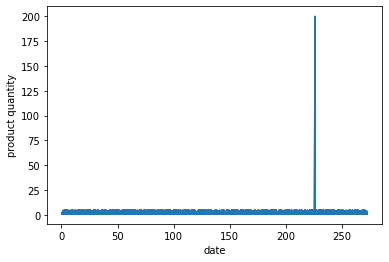

In [ ]:
# plot quantity purchaced per store number
plt.plot( np.array( transaction_data[ "store_nbr" ] ), np.array( transaction_data[ "prod_qty" ] ) )
plt.xlabel( "date" )
plt.ylabel( "product quantity" )

In [ ]:
# find average product quantity
avg_prod_qty = 0
for i in range( 0, len( transaction_data[ "prod_qty" ] ) ):
  avg_prod_qty += transaction_data[ "prod_qty" ][ i ]
avg_prod_qty /= len( transaction_data[ "prod_qty" ] )
print( avg_prod_qty )

1.907308674047335


Text(0, 0.5, 'amount')

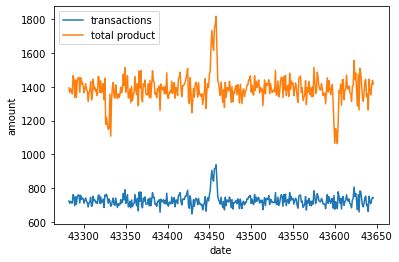

In [ ]:
# transactions and total product quantiy by date
transactions_by_date = [] # 0: date, 1: transactions
total_prod_by_date = [] # 0: date, 1: total product
for i in transaction_data_zip:
  found_in = False
  for j in transactions_by_date:
    if i[ 0 ] == j[ 0 ]:
      j[ 1 ] += 1
      found_in = True
  if not found_in:
    transactions_by_date.append( [ i[ 0 ], 1 ] )
  found_in = False
  for j in total_prod_by_date:
    if i[ 0 ] == j[ 0 ]:
      j[ 1 ] += i[ 6 ]
      found_in = True
  if not found_in:
    total_prod_by_date.append( [ i[ 0 ], i[ 6 ] ] )

# graph transactions on a daily basis
transactions_by_date_sorted = sorted( transactions_by_date, key=lambda x: x[ 0 ] )
transaction_dates = []
for i in transactions_by_date_sorted:
  transaction_dates.append( i[ 0 ] )
transaction_amounts = []
for i in transactions_by_date_sorted:
  transaction_amounts.append( i[ 1 ] )
plt.plot( np.array( transaction_dates ), np.array( transaction_amounts ), label="transactions" )

# graph total products sold on a daily basis
total_prod_by_date_sorted = sorted( total_prod_by_date, key=lambda x: x[ 0 ] )
total_prod_amounts = []
for i in total_prod_by_date_sorted:
  total_prod_amounts.append( i[ 1 ] )
plt.plot( np.array( transaction_dates ), np.array( total_prod_amounts ), label="total product" )

# legend for plot
plt.legend( loc="upper left" )
plt.xlabel( "date" )
plt.ylabel( "amount" )

In [ ]:
# get most popular with certian groups of people
# tdz is transaction_data_zip, pbz is purchace_behavior_zip, lifestage is lifestage from purchace behavior
def most_popular_with_group( tdz, pbz, lifestage ):
  most_popular = []
  purchase_behavior_group = []
  transaction_data_group = []
  for i in pbz:
    if i[ 1 ] == lifestage:
      purchase_behavior_group.append( i )
  for i in purchase_behavior_group:
    for j in tdz:  
      if j[ 2 ] == i[ 0 ]: # loyalty card number match
        transaction_data_group.append( j )
  for i in range( 0, len( transaction_data_group ) ):
    found_in = False
    for j in most_popular:
      if transaction_data_group[ i ][ 4 ] == j[ 0 ][ 4 ]: # if product number match found
        j[ 1 ] += transaction_data_group[ i ][ 6 ] # add quantity
        found_in = True
    if not found_in:
      most_popular.append( [ transaction_data_group[ i ], transaction_data_group[ i ][ 6 ] ] )
  most_popular_sorted = sorted( most_popular, key=lambda x: x[ 1 ] )
  return most_popular_sorted

In [ ]:
# find top 3 most popular with young singles
most_popular_with_young_singles = most_popular_with_group( transaction_data_zip, purchase_behavior_zip, "YOUNG SINGLES/COUPLES" )
print( len( most_popular_with_young_singles ) )
print( most_popular_with_young_singles[ len( most_popular_with_young_singles ) - 1 ] )
print( most_popular_with_young_singles[ len( most_popular_with_young_singles ) - 2 ] )

1
[(43390, 1, 1000, 1, 5, 'Natural Chip        Compny SeaSalt175g', 2, 6, 'Natural Chip        ', 'Compny SeaSalt', 175), 2]
[(43390, 1, 1000, 1, 5, 'Natural Chip        Compny SeaSalt175g', 2, 6, 'Natural Chip        ', 'Compny SeaSalt', 175), 2]


In [ ]:
# find top 3 most popular with midage singles couples
most_popular_with_midage_singles = most_popular_with_group( transaction_data_zip, purchase_behavior_zip, "MIDAGE SINGLES/COUPLES" )
print( len( most_popular_with_midage_singles ) )
print( most_popular_with_midage_singles[ len( most_popular_with_midage_singles ) - 1 ] )
print( most_popular_with_midage_singles[ len( most_popular_with_midage_singles ) - 2 ] )

1
[(43462, 1, 1005, 6, 86, 'Cheetos Puffs 165g', 1, 2.8, 'Cheetos Puffs 165g', '', 165), 1]
[(43462, 1, 1005, 6, 86, 'Cheetos Puffs 165g', 1, 2.8, 'Cheetos Puffs 165g', '', 165), 1]


In [ ]:
# find top 3 most popular with older singles couples
most_popular_with_older_singles = most_popular_with_group( transaction_data_zip, purchase_behavior_zip, "OLDER SINGLES/COUPLES" )
print( len( most_popular_with_older_singles ) )
print( most_popular_with_older_singles[ len( most_popular_with_older_singles ) - 1 ] )
print( most_popular_with_older_singles[ len( most_popular_with_older_singles ) - 2 ] )
print( most_popular_with_older_singles[ len( most_popular_with_older_singles ) - 3 ] )

14609
1
1
[(43406, 1, 1004, 5, 96, 'WW Original Stacked Chips 160g', 1, 1.9, 'WW Original Stacked ', 'Chips ', 160), 1]
[(43406, 1, 1004, 5, 96, 'WW Original Stacked Chips 160g', 1, 1.9, 'WW Original Stacked ', 'Chips ', 160), 1]


IndexError: list index out of range

In [ ]:
# find top 3 most popular with young families
most_popular_with_young_families = most_popular_with_group( transaction_data_zip, purchase_behavior_zip, "YOUNG FAMILIES" )
print( len( most_popular_with_young_families ) )
print( most_popular_with_young_families[ len( most_popular_with_young_families ) - 1 ] )
print( most_popular_with_young_families[ len( most_popular_with_young_families ) - 2 ] )
print( most_popular_with_young_families[ len( most_popular_with_young_families ) - 3 ] )

9178
2
2
[(43532, 1, 1003, 4, 106, 'Natural ChipCo      Hony Soy Chckn175g', 1, 3, 'Natural ChipCo      ', 'Hony Soy Chckn', 175), 1]
[(43531, 1, 1003, 3, 52, 'Grain Waves Sour    Cream&Chives 210G', 1, 3.6, 'Grain Waves Sour    ', 'Cream&Chives ', 0), 1]
[(43532, 1, 1003, 4, 106, 'Natural ChipCo      Hony Soy Chckn175g', 1, 3, 'Natural ChipCo      ', 'Hony Soy Chckn', 175), 1]


In [ ]:
# find top 3 most popular with older families
most_popular_with_older_families = most_popular_with_group( transaction_data_zip, purchase_behavior_zip, "OLDER FAMILIES" )
print( len( most_popular_with_older_families ) )
print( most_popular_with_older_families[ len( most_popular_with_older_families ) - 1 ] )
print( most_popular_with_older_families[ len( most_popular_with_older_families ) - 2 ] )
print( most_popular_with_older_families[ len( most_popular_with_older_families ) - 3 ] )

2
[(43635, 1, 1012, 17, 3, 'Kettle Sensations   Camembert & Fig 150g', 1, 4.6, 'Kettle Sensations   ', 'Camembert & Fig ', 150), 1]
[(43539, 1, 1012, 16, 20, 'Doritos Cheese      Supreme 330g', 1, 5.7, 'Doritos Cheese      ', 'Supreme ', 330), 1]
[(43635, 1, 1012, 17, 3, 'Kettle Sensations   Camembert & Fig 150g', 1, 4.6, 'Kettle Sensations   ', 'Camembert & Fig ', 150), 1]


<BarContainer object of 7 artists>

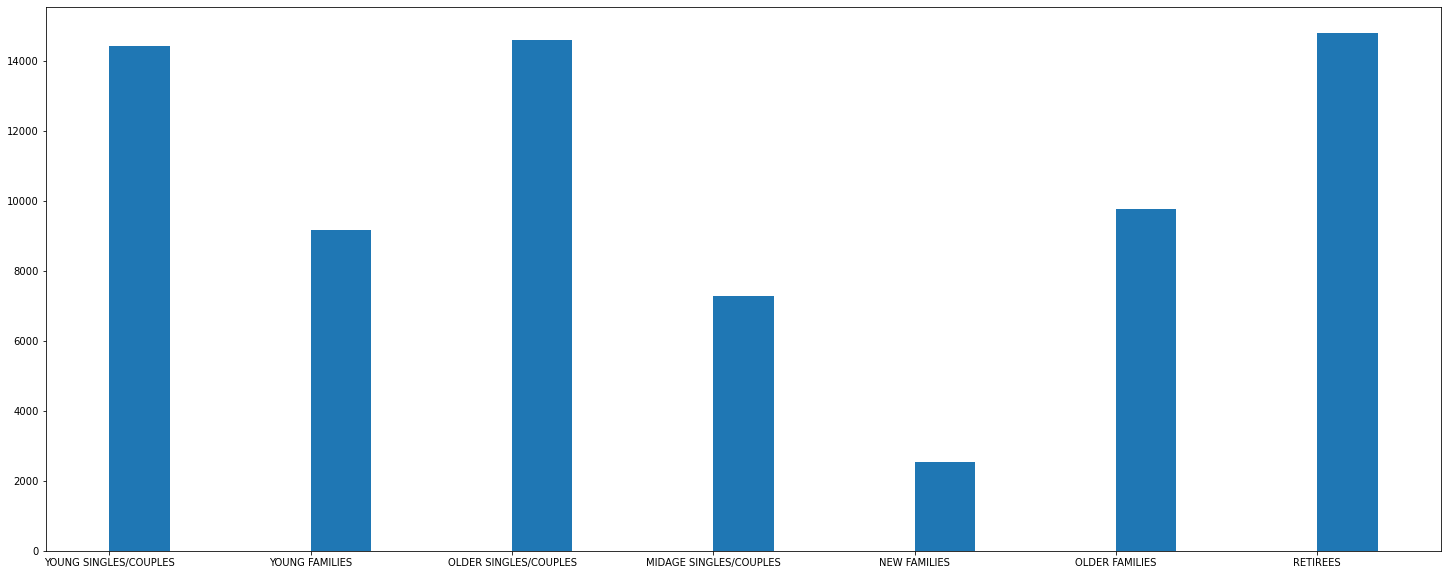

In [ ]:
# count customers by lifestage
count_customers_by_lifestage = {}
for i in purchase_behavior_zip:
  if i[ 1 ] in count_customers_by_lifestage: # if has lifestage
    count_customers_by_lifestage[ i[ 1 ] ] += 1
  else:
    count_customers_by_lifestage[ i[ 1 ] ] = 1
plt.figure( figsize=(25, 10) )
plt.bar( count_customers_by_lifestage.keys(), count_customers_by_lifestage.values(), align='edge', width=0.3 )

<BarContainer object of 7 artists>

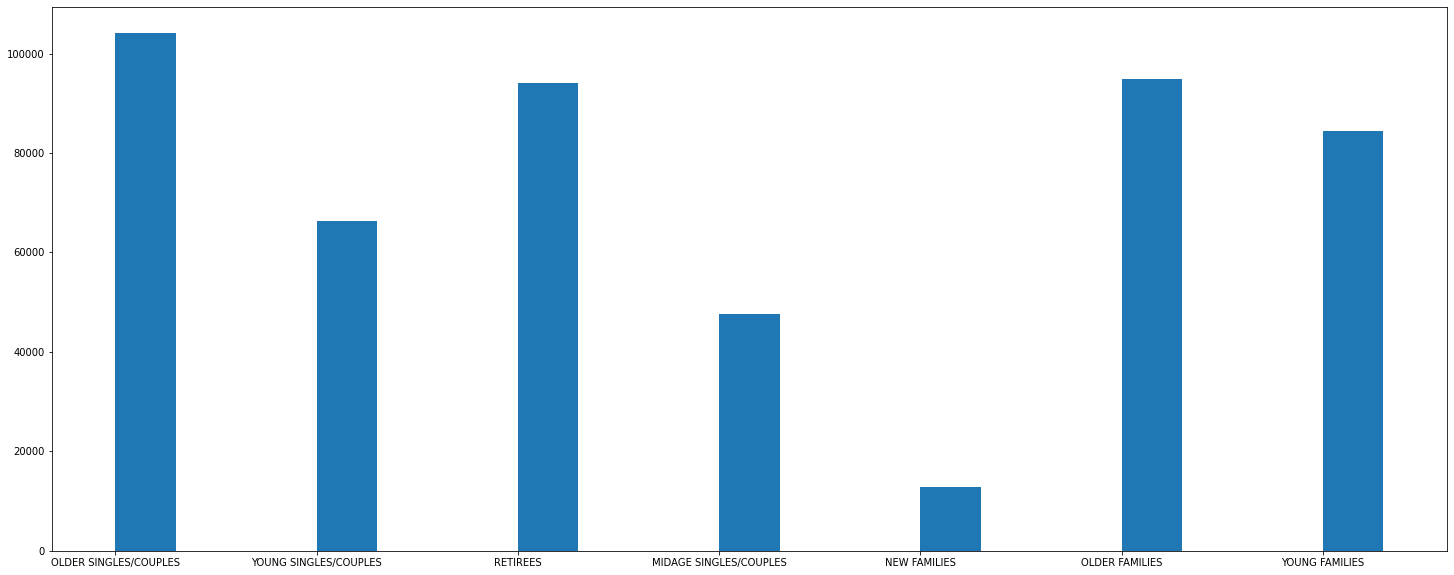

In [49]:
# count chips bought by lifestage
product_quantity_customers_by_lifestage = {}
for i in purchase_behavior_zip:
  if not i[ 1 ] in product_quantity_customers_by_lifestage: # if has lifestage
    product_quantity_customers_by_lifestage[ i[ 1 ] ] = 0
  tdz_deepcopy = copy.deepcopy( transaction_data_zip )
  for j in tdz_deepcopy:
    if i[ 0 ] == j[ 2 ]: # if loyalty card number maches
      product_quantity_customers_by_lifestage[ i[ 1 ] ] += j[ 6 ] # add product quantity
plt.figure( figsize=(25, 10) )
plt.bar( product_quantity_customers_by_lifestage.keys(), product_quantity_customers_by_lifestage.values(), align='edge', width=0.3 )

<BarContainer object of 7 artists>

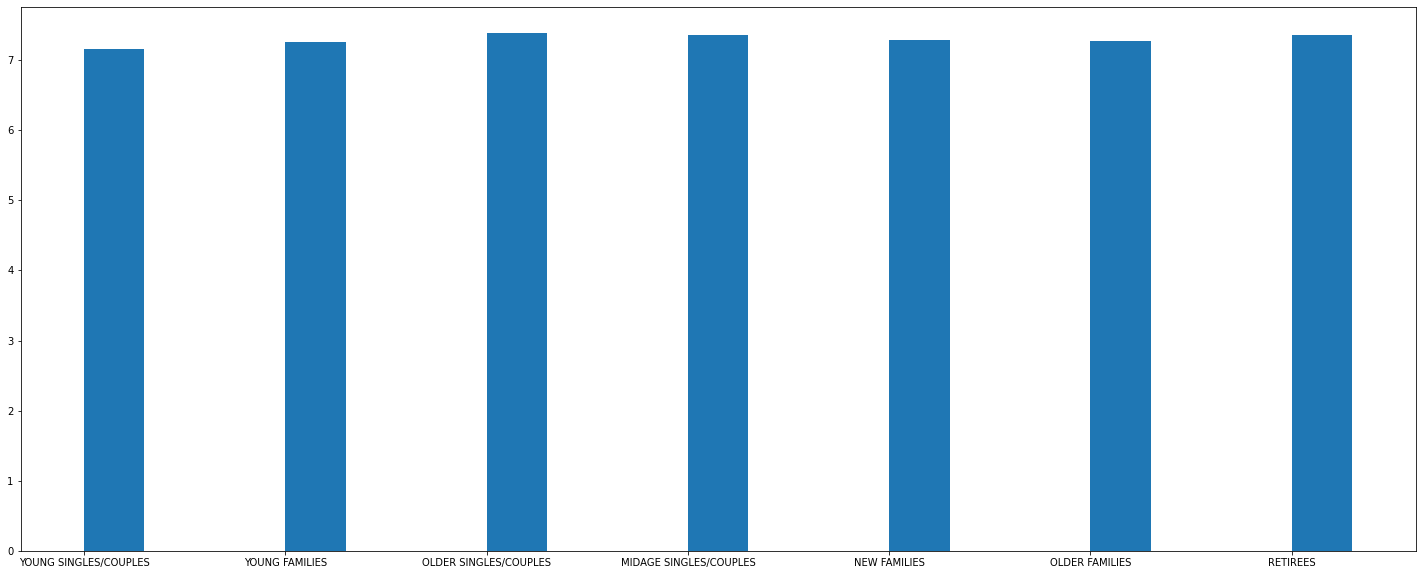

In [64]:
# average chip price by lifestage
average_chip_price_by_lifestage = {}
number_chip_price_by_lifestage = {}
for i in purchase_behavior_zip:
  if not i[ 1 ] in average_chip_price_by_lifestage:
    average_chip_price_by_lifestage[ i[ 1 ] ] = 0
    number_chip_price_by_lifestage[ i[ 1 ] ] = 0
  tdz_deepcopy = copy.deepcopy( transaction_data_zip )
  for j in tdz_deepcopy:
    if i[ 0 ] == j[ 2 ]:
      average_chip_price_by_lifestage[ i[ 1 ] ] += j[ 7 ]
      number_chip_price_by_lifestage[ i[ 1 ] ] += 1
for key in average_chip_price_by_lifestage.keys():
  average_chip_price_by_lifestage[ key ] /= number_chip_price_by_lifestage[ key ]

plt.figure( figsize=( 25, 10 ) )
plt.bar( average_chip_price_by_lifestage.keys(), average_chip_price_by_lifestage.values(), align='edge', width=0.3  )

<BarContainer object of 3 artists>

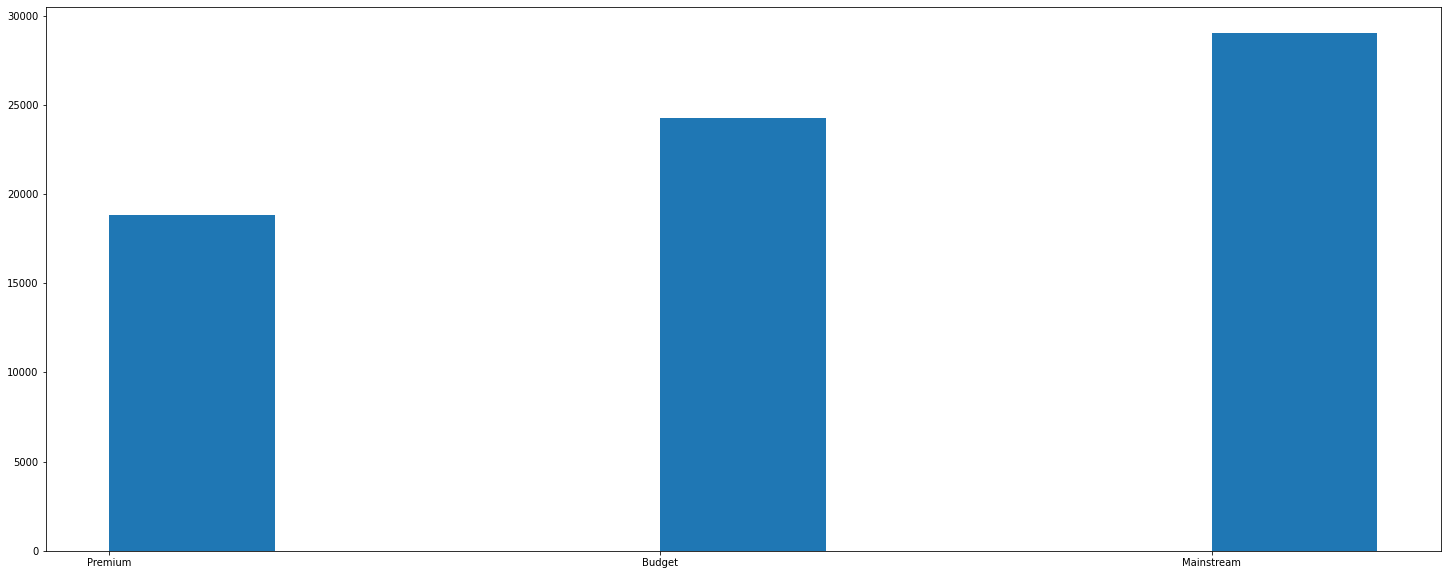

In [56]:
# number of coustomers by loyalty type (premium, mainstream, budget)
count_customers_by_premium = {}
for i in purchase_behavior_zip:
  if not i[ 2 ] in count_customers_by_premium:
    count_customers_by_premium[ i[ 2 ] ] = 0
  count_customers_by_premium[ i[ 2 ] ] += 1

plt.figure( figsize=( 25, 10 ) )
plt.bar( count_customers_by_premium.keys(), count_customers_by_premium.values(), align="edge", width=0.3 )

<BarContainer object of 3 artists>

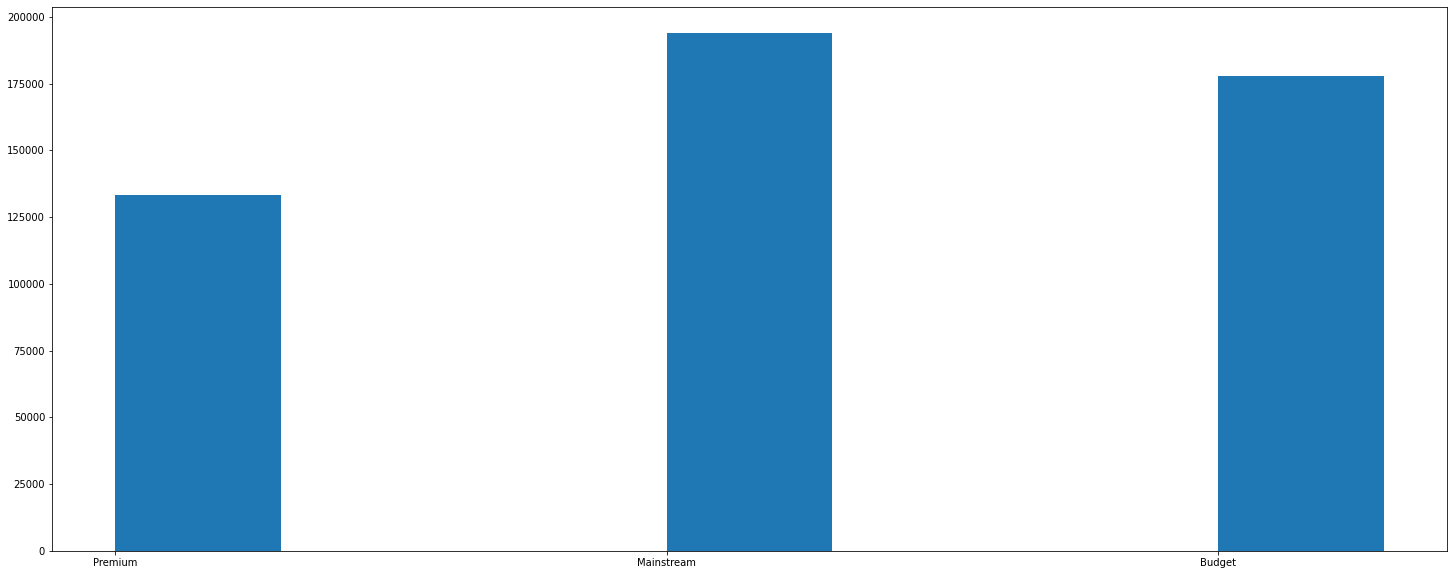

In [68]:
# quantity of product by premium customer type
product_quantity_customers_by_premium = {}
for i in purchase_behavior_zip:
  if not i[ 2 ] in product_quantity_customers_by_premium:
    product_quantity_customers_by_premium[ i[ 2 ] ] = 0
  tdz_deepcopy = copy.deepcopy( transaction_data_zip )
  for j in tdz_deepcopy:
    if i[ 0 ] == j[ 2 ]:
      product_quantity_customers_by_premium[ i[ 2 ] ] += j[ 6 ]
plt.figure( figsize=( 25, 10 ) )
plt.bar( product_quantity_customers_by_premium.keys(), product_quantity_customers_by_premium.values(), align="edge", width=0.3 )

In [69]:
# get most popular products by customer lifestage
def get_most_popular_with_premium( premium_status ):
  transaction_data_most_popular_with_premium = []
  for i in purchase_behavior_zip:
    tdz_deepcopy = copy.deepcopy( transaction_data_zip )
    for j in tdz_deepcopy:
      if i[ 2 ] == premium_status and i[ 0 ] == j[ 2 ]:
        found_in = False
        for k in transaction_data_most_popular_with_premium:
          if k[ 0 ][ 4 ] == j[ 4 ]:
            found_in = True
            k[ 1 ] += 1
        if not found_in:
          transaction_data_most_popular_with_premium.append( [ j, 1 ] )
  transaction_data_most_popular_with_premium_sorted = sorted( transaction_data_most_popular_with_premium, key=lambda x: x[ 1 ] )
  return transaction_data_most_popular_with_premium_sorted

In [76]:
# find most popular with premium
most_popular_with_premium = get_most_popular_with_premium( "Premium" )
print( most_popular_with_premium[ len( most_popular_with_premium ) - 1 ] )
print( most_popular_with_premium[ len( most_popular_with_premium ) - 2 ] )
print( most_popular_with_premium[ len( most_popular_with_premium ) - 3 ] )

In [ ]:
# find most popular with mainstream
most_popular_with_mainstream = get_most_popular_with_premium( "Mainstream" )
print( most_popular_with_mainstream[ len( most_popular_with_mainstream ) - 1 ] )
print( most_popular_with_mainstream[ len( most_popular_with_mainstream ) - 2 ] )
print( most_popular_with_mainstream[ len( most_popular_with_mainstream ) - 3 ] )

In [ ]:
# find most popular with budget
most_popular_with_budget = get_most_popular_with_premium( "Budget" )
print( most_popular_with_budget[ len( most_popular_with_budget ) - 1 ] )
print( most_popular_with_budget[ len( most_popular_with_budget ) - 2 ] ) 
print( most_popular_with_budget[ len( most_popular_with_budget ) - 3 ] )

<BarContainer object of 7 artists>

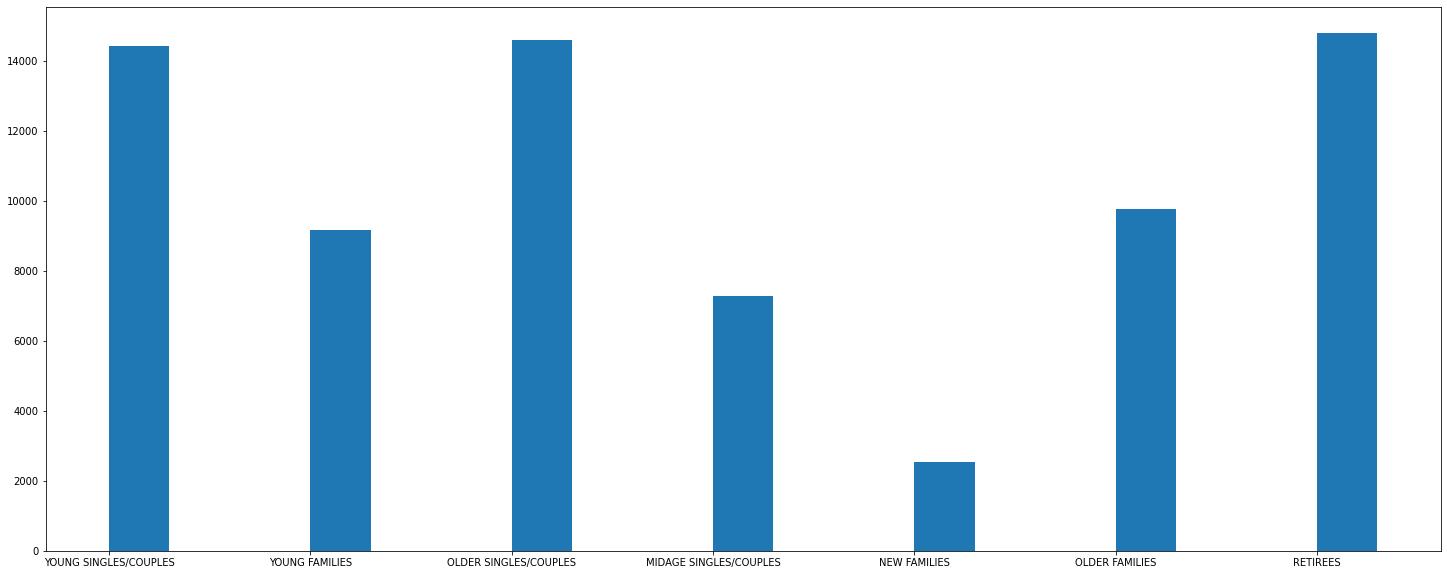

In [73]:
# number of customers by lifestages
number_of_customers_by_lifestage = {}
for i in purchase_behavior_zip:
  if not i[ 1 ] in number_of_customers_by_lifestage:
    number_of_customers_by_lifestage[ i[ 1 ] ] = 1
  else:
    number_of_customers_by_lifestage[ i[ 1 ] ] += 1
plt.figure( figsize=( 25, 10 ) )
plt.bar( number_of_customers_by_lifestage.keys(), number_of_customers_by_lifestage.values(), 0.3, align="edge" )